<font size = "6">Wine Quality Classification</font>

<font size = "5">Importing libraries</font>

In [103]:
import matplotlib.pyplot as plt # Plotting graphs
import numpy as np # Working with large arrays/matrices
import pandas as pd # Load files
import random
import seaborn as sns # More visualisation
import scipy # Image manipulation during data preprocessing
from scipy.stats import pearsonr

import sklearn # Built-in AI models
from sklearn import datasets, linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

<font size = "4">Step 1: Data Visualisation</font>

<font size = "3">1.1 Loads the data</font>

In [56]:
all_df = pd.read_csv('winequality-white.csv', index_col = False)
all_df.head()

,Fixed Acidity,Volatile Acidity,Citric Acid,Residual Sugar,Chlorides,Free Sulfur Dioxide,Total Sulfur Dioxide,Density,pH,Sulphates,Alcohol,Quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


<font size = "3">1.2 Gets a brief description of the features</font>

In [57]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Fixed Acidity         4898 non-null   float64
 1   Volatile Acidity      4898 non-null   float64
 2   Citric Acid           4898 non-null   float64
 3   Residual Sugar        4898 non-null   float64
 4   Chlorides             4898 non-null   float64
 5   Free Sulfur Dioxide   4898 non-null   float64
 6   Total Sulfur Dioxide  4898 non-null   float64
 7   Density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   Sulphates             4898 non-null   float64
 10  Alcohol               4898 non-null   float64
 11  Quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


<font size = "3">1.3 Gets basic statistics calculation like mean, IQR, 25%, etc. </font>

In [58]:
all_df.describe()

,Fixed Acidity,Volatile Acidity,Citric Acid,Residual Sugar,Chlorides,Free Sulfur Dioxide,Total Sulfur Dioxide,Density,pH,Sulphates,Alcohol,Quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


<font size = "3">1.4 Checks the distribution of the feature that will be classified </font>

In [59]:
all_df['Quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: Quality, dtype: int64

<font size = "3">1.5 Bar charts</font>

<AxesSubplot:xlabel='Quality', ylabel='count'>

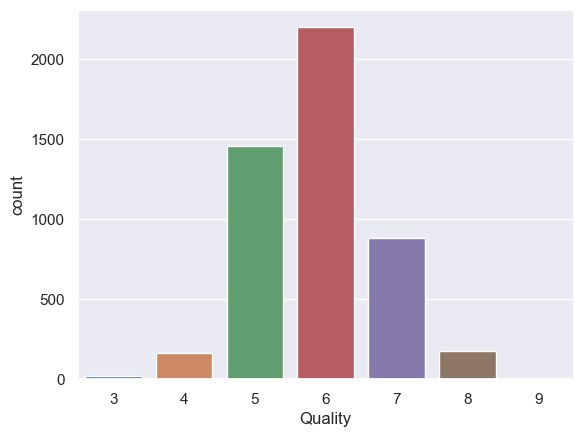

In [60]:
sns.countplot(x = "Quality", data = all_df)

<font size = "3">1.6 Box plots</font>

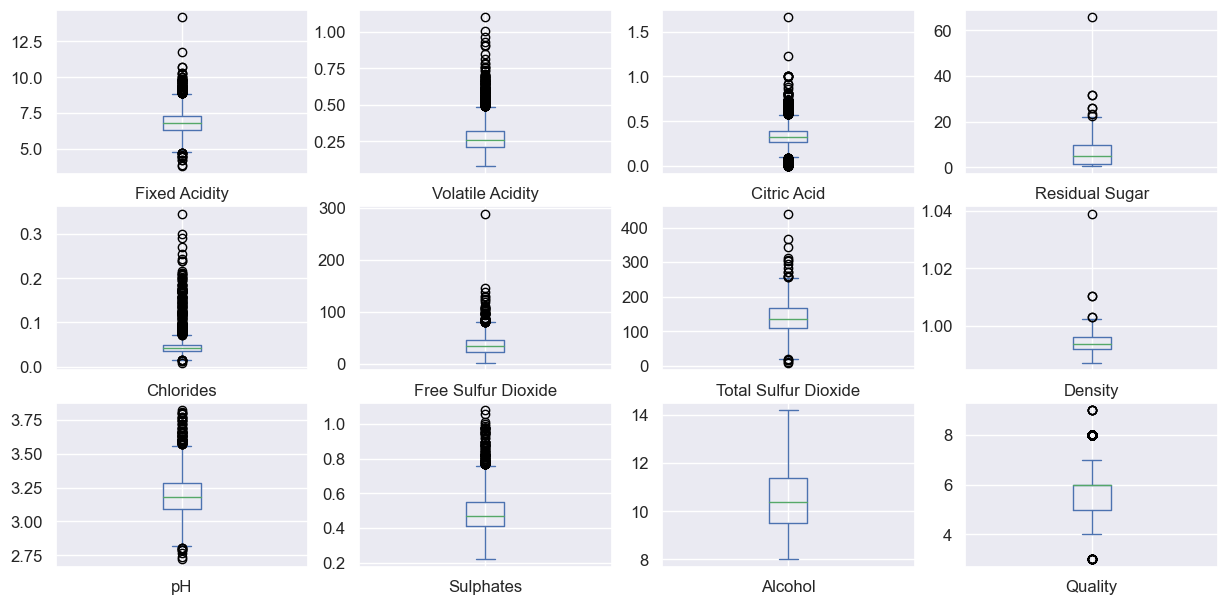

In [61]:
data_mean = all_df.iloc[:, :] # Creates a specific row/column from the data set
data_mean.plot(kind='box', subplots=True, layout=(8,4), sharex=False, sharey=False, fontsize=12, figsize=(15,20)); # Plotting the box plot

<font size = "3"> 1.7 Feature Data ranges </font>

<AxesSubplot:>

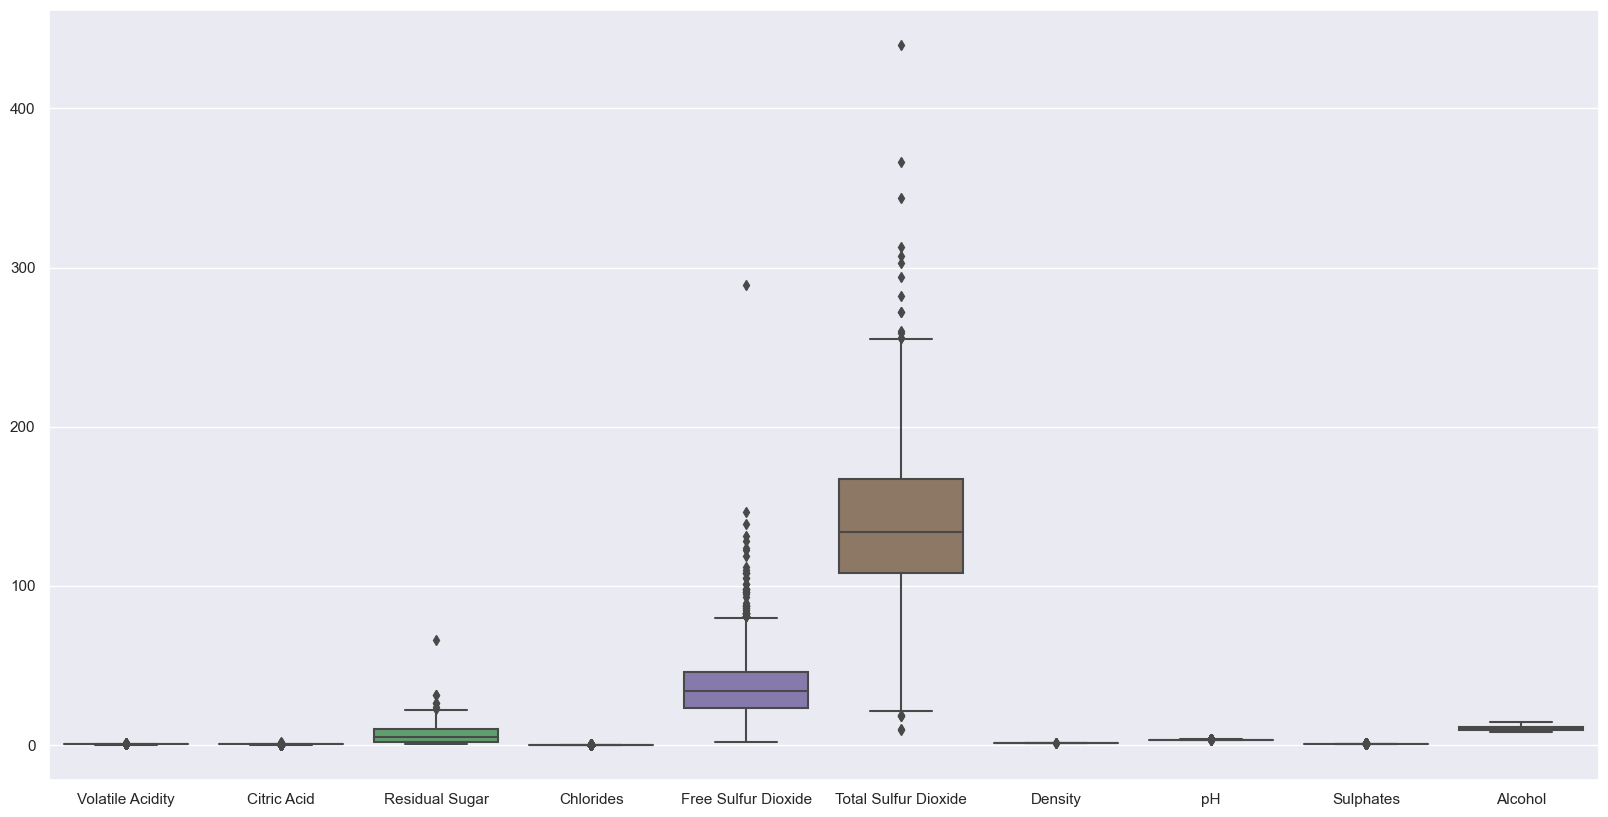

In [62]:
fig,ax=plt.subplots(1,figsize=(20,10))
sns.boxplot(data=all_df.iloc[:, 1:11],ax=ax) # 1:11 indicating the first 10 features only

<font size = "3">1.8 Checks for discrimination </font>

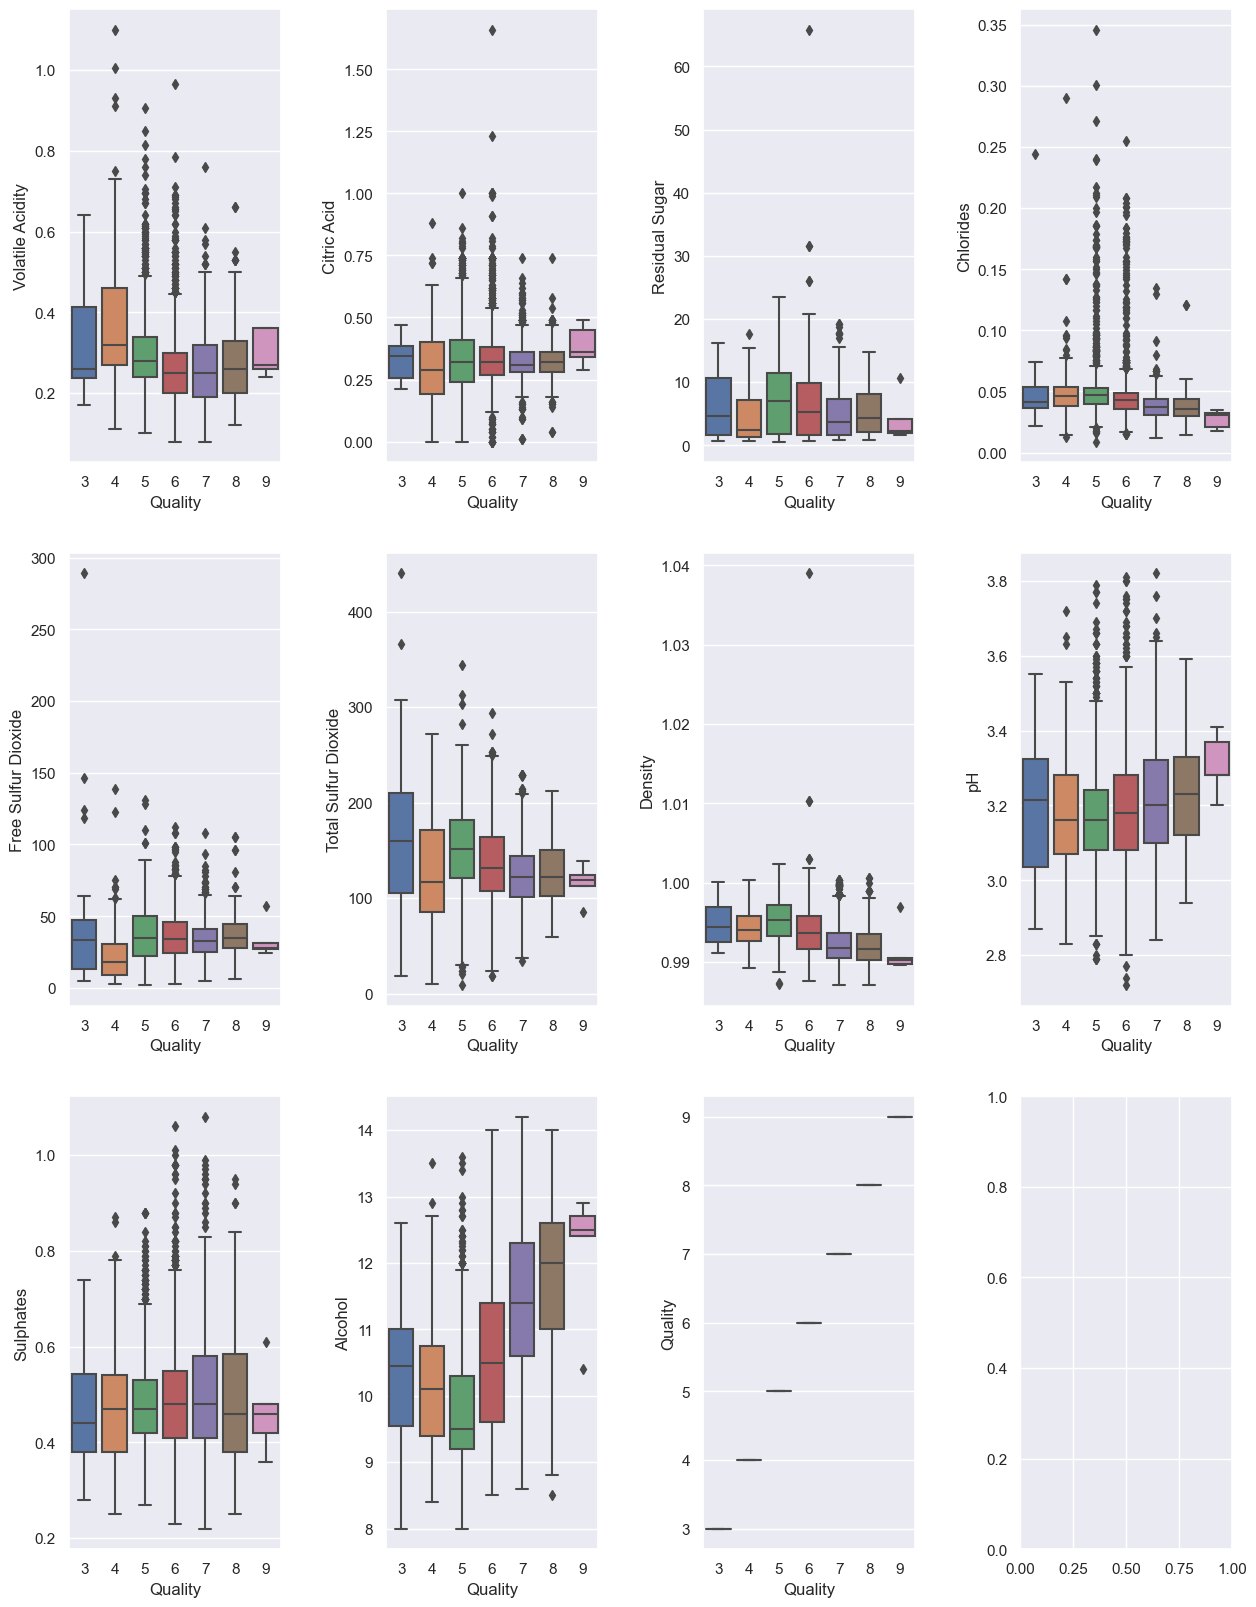

In [63]:
fig, axes = plt.subplots(nrows = 3, ncols = 4, figsize = (15,20))
fig.subplots_adjust(hspace = .2, wspace = .5)
axes = axes.ravel()
for i, col in enumerate(all_df.columns[1:]):
    _= sns.boxplot(y = col, x = 'Quality', data = all_df, ax = axes[i])

<font size = "3">1.9 Correlation Matrix </font>

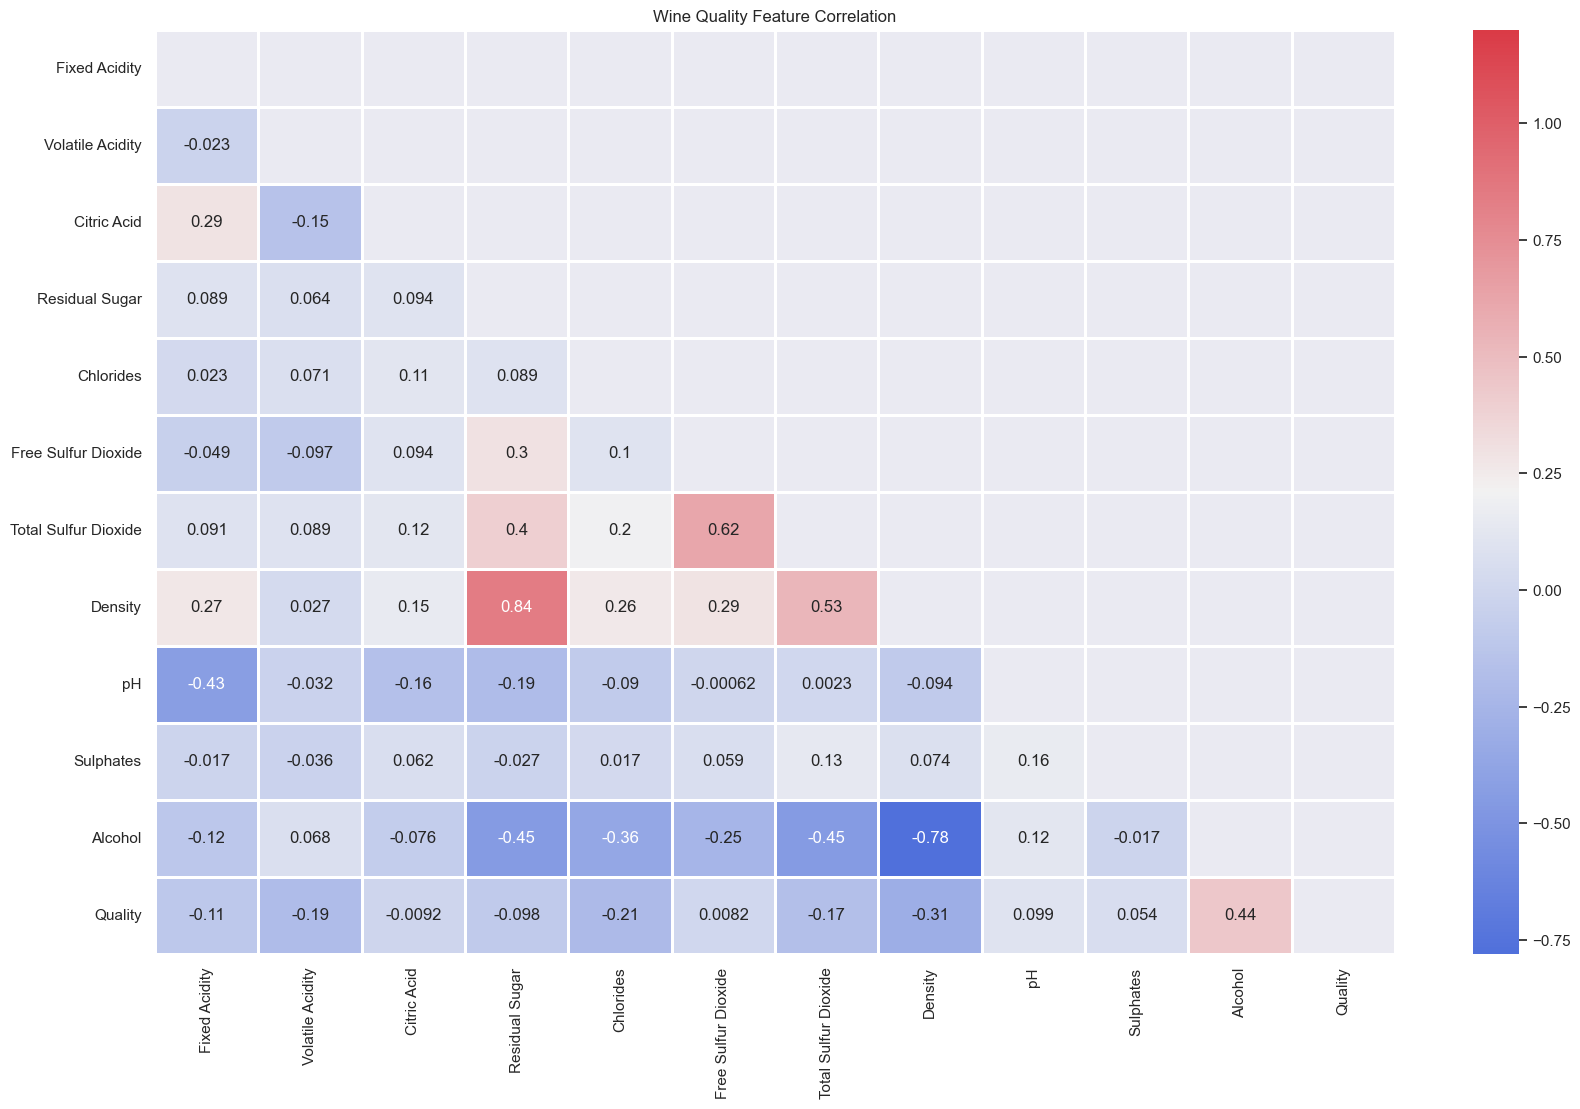

In [64]:
corrMatt = all_df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corrMatt)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(20, 12))
plt.title('Wine Quality Feature Correlation')

# Generate a custom diverging colormap
cmap = sns.diverging_palette(260, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corrMatt, vmax=1.2, square=False, cmap=cmap, mask=mask,
ax=ax, annot=True, fmt='.2g', linewidths=1);

<font size = "3">1.10 Scatter plot </font>

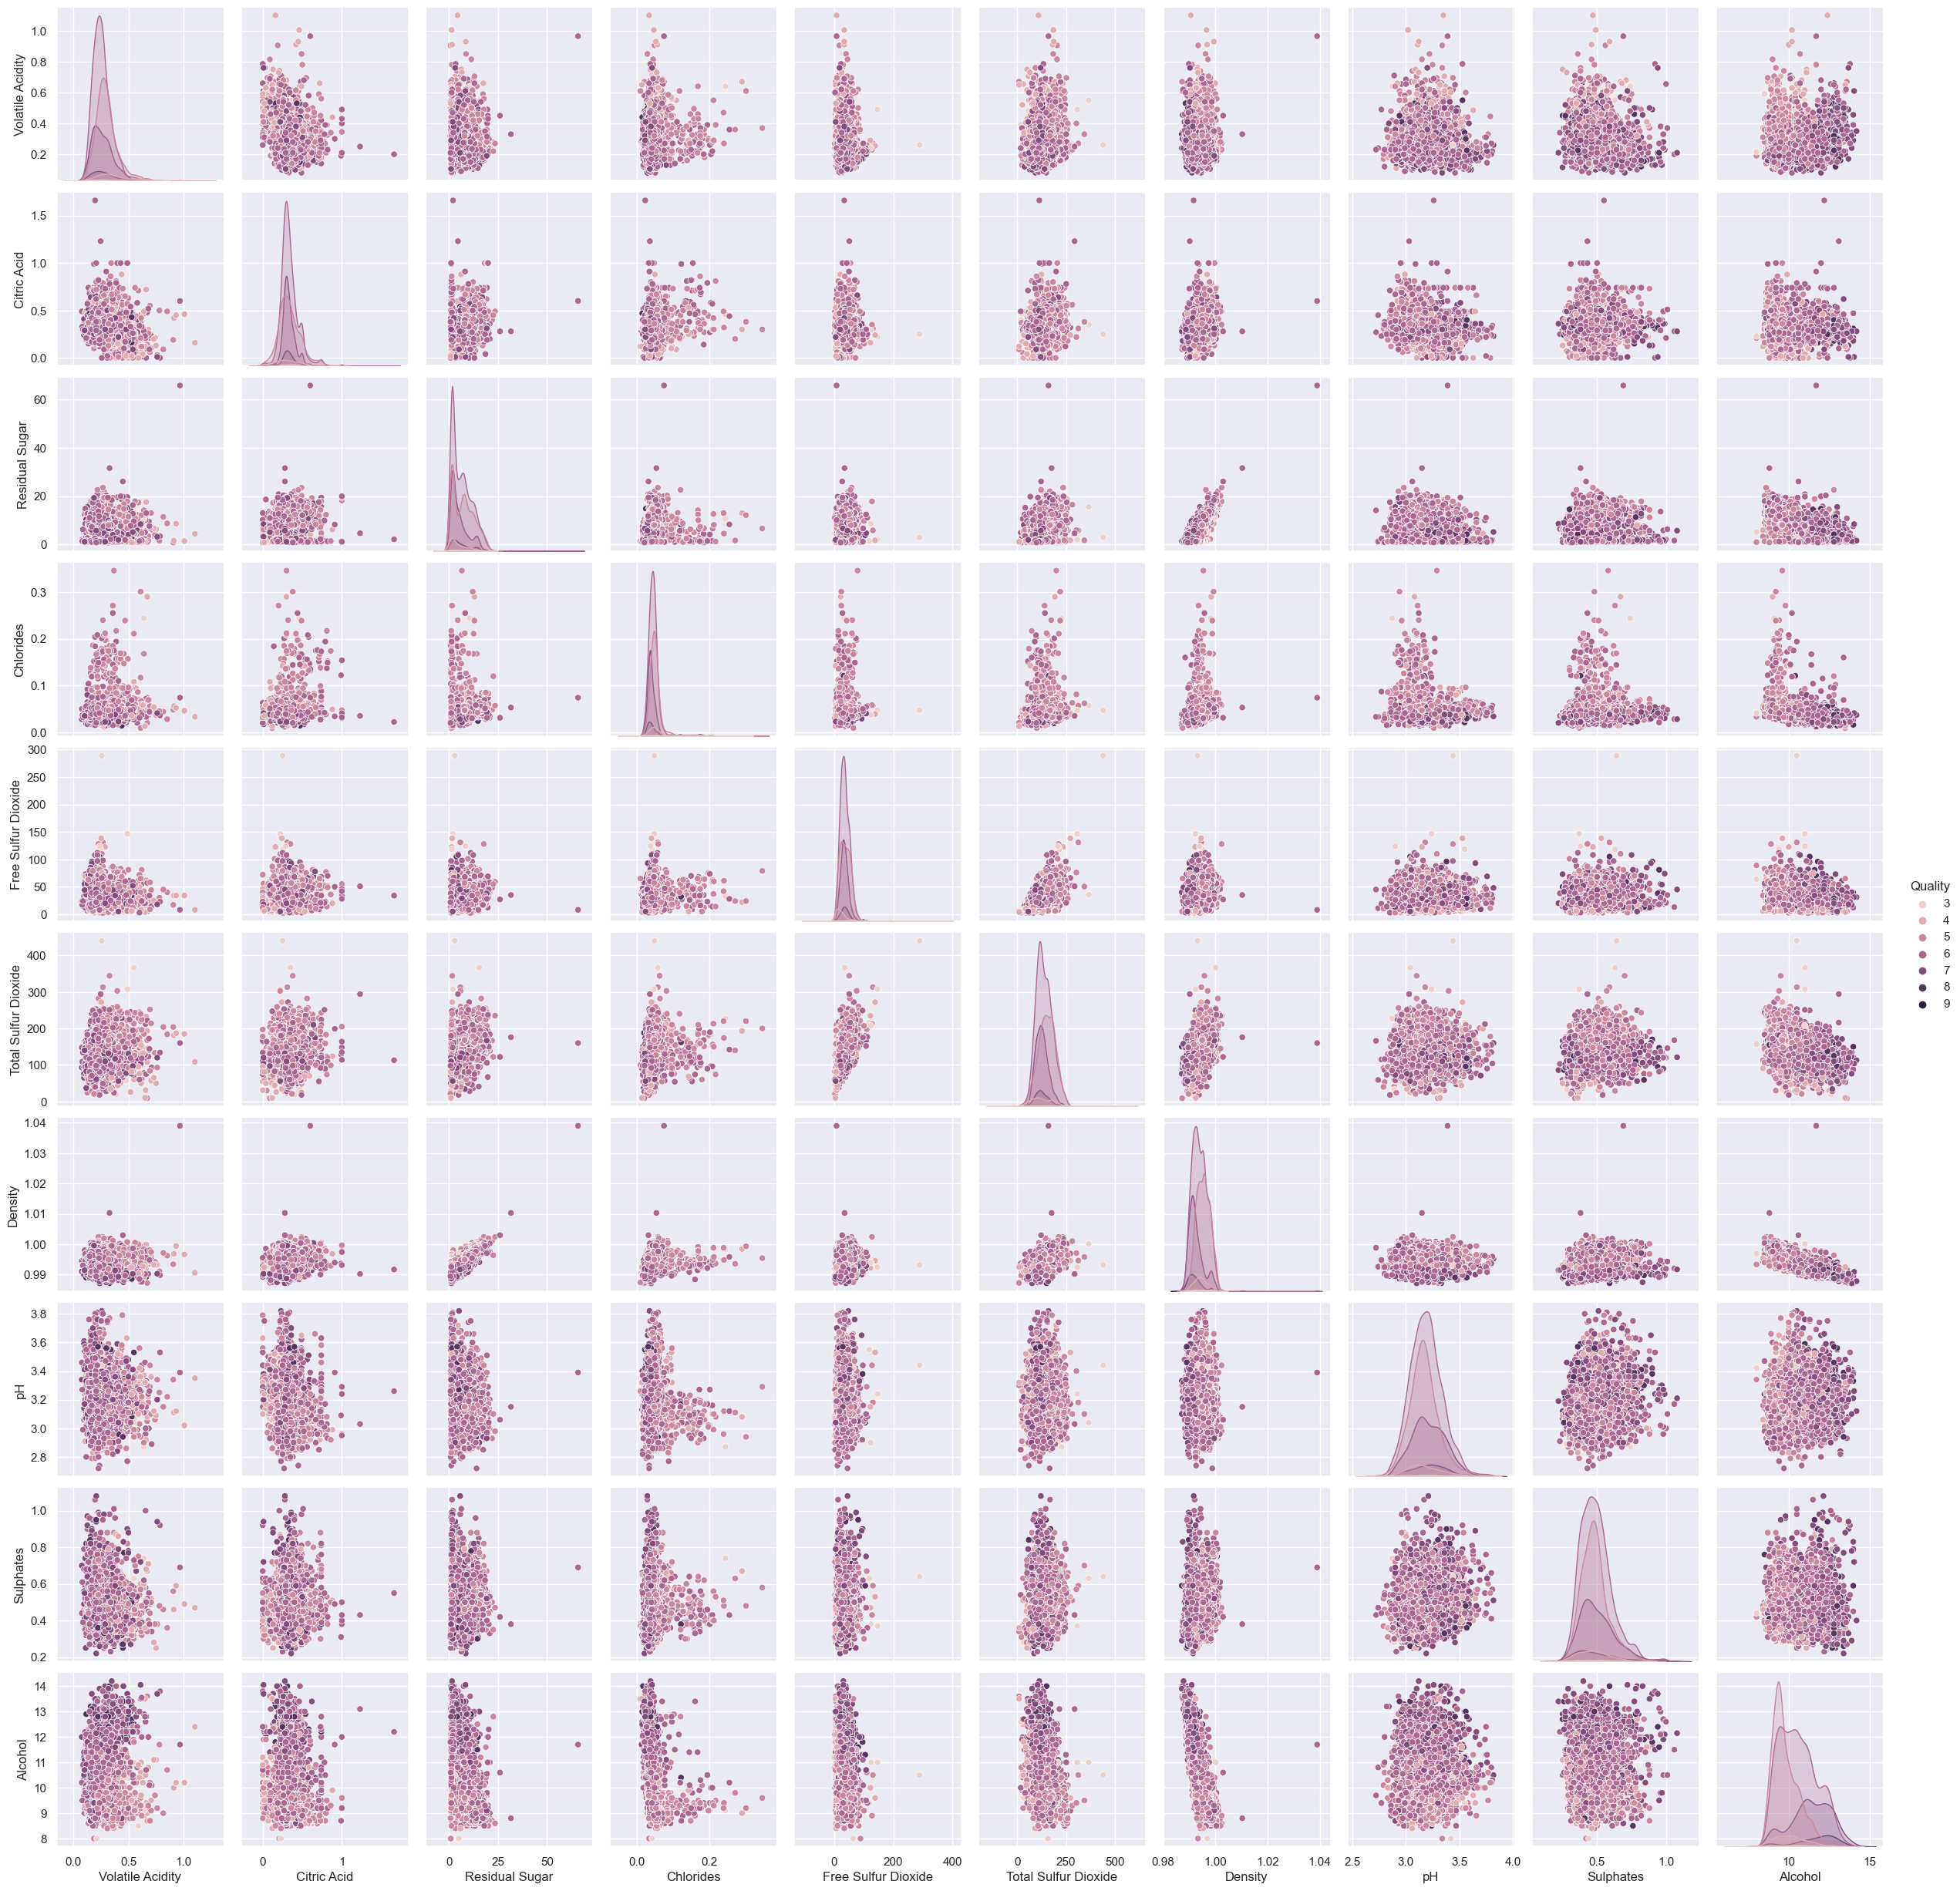

In [65]:
sns.pairplot(all_df[list(all_df.columns[1:11]) + ['Quality']], hue="Quality"); # Only for the first 10

<font size = "4">Step 2: Data preprocessing and analysis </font>

<font size = "3"> 2.1 Feature Normalisation </font>

<AxesSubplot:>

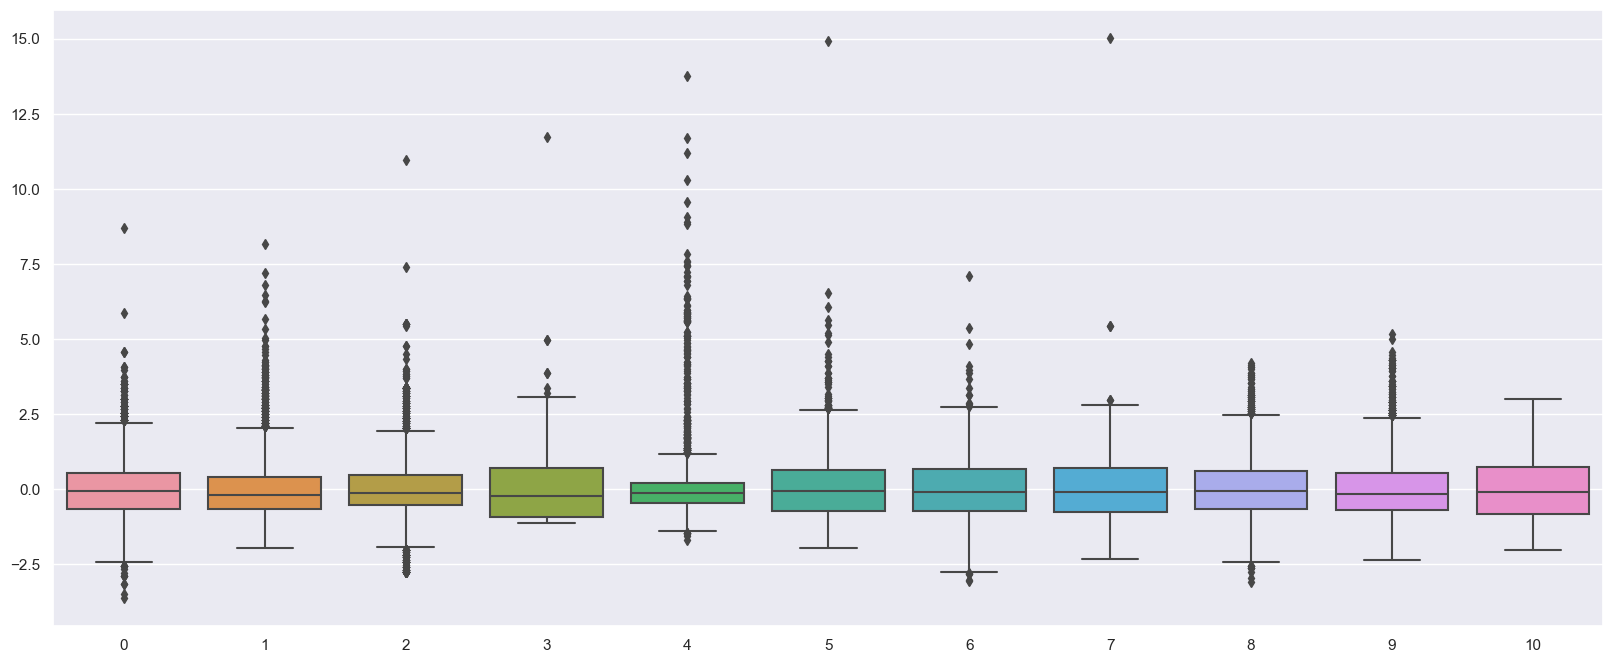

In [66]:
# Assign features to X
X = all_df.drop('Quality', axis = 1) # Drop all the feature columns to become X axis.
 
# Normalise the features to use zero mean normalisation
# only for the first 10 features

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xs = scaler.fit_transform(X) # To be used in PCA
fig,ax=plt.subplots(1,figsize=(20,8))
sns.boxplot(data=Xs,ax=ax) 

<font size = "3">2.2 Principle Component Analysis</font>

<font size = "3">2.2.1 Transform class label from string to numerical </font>

In [67]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
all_df['Quality'] = le.fit_transform(all_df['Quality'])
all_df.head()

# assign numerical label to y
y = all_df['Quality']

<font size = "3">2.2.2 Apply PCA for dimensionality reduction </font>

In [68]:
from sklearn.decomposition import PCA

# Reduce from "n" to 2 features with PCA
pca = PCA(n_components = 2)
 
# Fit and transform data
pca_features = pca.fit_transform(Xs)
 
# Create dataframe
pca_df = pd.DataFrame(
    data = pca_features, 
    columns = ['PC1', 'PC2'])
 
# map target names to PCA features   
target_names = {
    0:'3',
    1:'4', 
    2:'5',
    3:'6',
    4:'7',
    5:'8',
    6:'9'
}
 
pca_df['target'] = y
pca_df['target'] = pca_df['target'].map(target_names)
 
pca_df.head()

,PC1,PC2,target
0,3.676944,-0.545233,6
1,-0.644588,0.430770,6
2,0.155291,-1.189800,6
3,1.455374,0.099680,6
4,1.455374,0.099680,6


<font size = "3">2.2.3 New PCA Graph </font>

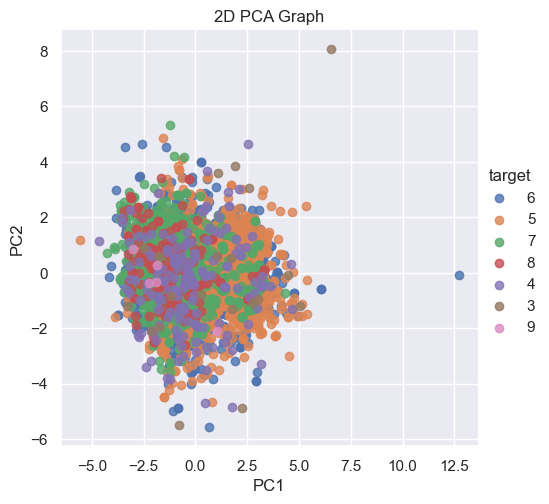

In [69]:
sns.set()
 
sns.lmplot(
    x = 'PC1', 
    y = 'PC2', 
    data = pca_df, 
    hue = 'target', 
    fit_reg = False, 
    legend = True
    )
 
plt.title('2D PCA Graph')
plt.show()

<font size = "4">Step 3: Predictive Model</font>

<font size = "3">3.1 Training and Test Data </font>

In [72]:
Xs_train, Xs_test, y_train, y_test = train_test_split(Xs, y, test_size = 0.2, random_state = 1, stratify = y)

<font size = "3">3.2 Get AI model</font>

In [78]:
# Support Vector Classifier
from sklearn.svm import SVC

# Using Support Vector Classifier and train
clf = SVC(C = 1.0, kernel = 'rbf', degree = 3, gamma ='auto', probability = True)
clf.fit(Xs_train, y_train)

SVC(gamma='auto', probability=True)

<font size = "3">3.2.1 Apply on test set </font>

In [79]:
# Do some testing on the test dataset and output the accuracy

classifier_score = clf.score(Xs_test, y_test)
print('The classifier accuracy score is {:03.2f}'.format(classifier_score))

The classifier accuracy score is 0.60


<font size = "3">3.2.2 Improve with K-fold cross validation </font>

In [81]:
# Get average of 5-fold cross-validation score using an SVM classifier.
from sklearn.model_selection import cross_val_score

n_folds = 5
clf_cv = SVC(C=1.0, kernel = 'rbf', degree = 3, gamma = 'auto')
cv_error = np.average(cross_val_score(clf_cv, Xs, y, cv = n_folds))
print('The {}-fold cross-validation accuracy score for this classifier is {:.2f}'.format(n_folds, cv_error))

The 5-fold cross-validation accuracy score for this classifier is 0.53


<font size = "3">3.2.3 Test different features</font>

In [82]:
# Now Let's try classification with some selected features, not all the features.

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline

# model with just 3 best features selected (k = 3)
clf_fs_cv = Pipeline([
 ('feature_selector', SelectKBest(f_classif, k = 3)),
 ('svc', SVC(C = 1.0, kernel = 'rbf', degree = 3, gamma = 'auto', probability = True))
])

# Specify 5 folds
scores = cross_val_score(clf_fs_cv, Xs, y, cv = 5)

print(scores)
avg = (100 * np.mean(scores), 100 * np.std(scores)/np.sqrt(scores.shape[0]))
print("Average score and standard deviation: (%.2f +- %.3f)%%" %avg)

[0.48469388 0.45306122 0.54897959 0.53115424 0.54443309]
Average score and standard deviation: (51.25 +- 1.674)%


<font size = "4">Step 4: Evaluation</font>

<font size = "3">4.1 Check performance with confusion matrix</font>

In [83]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = clf.fit(Xs_train, y_train).predict(Xs_test)
cm = confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.56      0.15      0.24        33
           2       0.63      0.64      0.64       291
           3       0.57      0.78      0.66       440
           4       0.68      0.31      0.42       176
           5       0.00      0.00      0.00        35
           6       0.00      0.00      0.00         1

    accuracy                           0.60       980
   macro avg       0.35      0.27      0.28       980
weighted avg       0.59      0.60      0.57       980



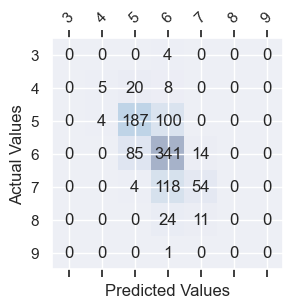

In [88]:
# Plotting the confusion matrix
fig, ax = plt.subplots(figsize = (3,3))
ax.matshow(cm, cmap = plt.cm.Blues, alpha = 0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x = j, y = i,
            s = cm[i, j],
            va = 'center', ha='center')
        
# NOTE: Cannot avoid "precision/f-score are ill defined" error if your data does not output a difference between true positives and false positives
        
# It won't show 3, 4, 5, etc on graph.  Instead, it will show the converted numerical values
classes = ["3","4","5","6","7","8","9"]
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Values', )
plt.ylabel('Actual Values');

# NOTE: The error can be "SUPPRESSED" but not fixed by adding "zero_division = 0"
print(classification_report(y_test, y_pred, zero_division = 0))

<font size = "5">Additionals</font>

<font size = "4">1. Multi-layer Perceptron Neural Network</font>

In [105]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 1)
mlp_clf = MLPClassifier(random_state = 1, max_iter = 300).fit(X_train, y_train)

In [106]:
pred_values4 = mlp_clf.predict(X_test)

In [107]:
y_pred = mlp_clf.predict(X_test)
print("The Score with ", (r2_score(y_test,pred_values4)))

The Score with  0.18302071370847672


<font size = "4">2. Decision Tree Classifier</font>

In [119]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state = 5)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=5)

In [120]:
pred_values3 = dt_clf.predict(X_test)

In [121]:
r2score = r2_score(y_test, pred_values3)
print("R^2 score:", r2score)

R^2 score: 0.0986134149972352


In [130]:
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.52


<font size = "4">3. Random Forest</font>

In [131]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
rf_clf = RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
rf_clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [132]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.52
